<img src="https://www.mmu.edu.my/fci/wp-content/uploads/2021/01/FCI_wNEW_MMU_LOGO.png" style="height: 80px;" align=right>


#CDS6354 Machine Learning
## Group 28
### Project (40%)


NAME : LAM ZI FOONG  
ID : 1221303175

NAME : CHAI DI SHENG  
ID : 1211101961

NAME : TEOH KAI LOON  
ID :  1211101582

NAME :  WONG KAH CHUN  
ID : 1221304973


# Problem Statement
Rental Price Prediction in Kuala Lumpur & Selangor
The real estate rental market in Kuala Lumpur and Selangor is dynamic, with prices varying based on multiple factors such as location, property type, amenities, and economic conditions. Prospective tenants and property investors often struggle to determine fair rental prices, leading to inefficiencies in the market.

This project aims to develop a predictive model that estimates rental prices based on key property attributes such as location, size, number of bedrooms, amenities, and market trends. By leveraging historical rental listings, the model will provide data-driven insights to help landlords set competitive prices and assist renters in making informed decisions.

# Key Objectives:
- Analyze Factors Affecting Rent: Identify the primary features influencing rental prices.
- Develop a Predictive Model: Use machine learning to estimate rental prices based on property attributes.
- Provide Market Insights: Offer insights into rental trends across different regions which is in KL and Selangor.
- Enhance Decision-Making: Help landlords and tenants make better pricing decisions.

# For Google Colab Use

In [ ]:
from google.colab import drive
drive.mount(('/content/drive'))

dp=('/content/drive/MyDrive/ML_labproject/')

Mounted at /content/drive


# Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

%matplotlib inline

try:
  dp
except NameError:
  dp = ''

data = pd.read_csv(dp+'mudah-apartment-kl-selangor.csv')
data.info()
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19991 entries, 0 to 19990
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ads_id                 19991 non-null  int64  
 1   prop_name              19043 non-null  object 
 2   completion_year        10806 non-null  float64
 3   monthly_rent           19989 non-null  object 
 4   location               19991 non-null  object 
 5   property_type          19991 non-null  object 
 6   rooms                  19985 non-null  object 
 7   parking                14289 non-null  float64
 8   bathroom               19985 non-null  float64
 9   size                   19991 non-null  object 
 10  furnished              19986 non-null  object 
 11  facilities             17782 non-null  object 
 12  additional_facilities  14043 non-null  object 
 13  region                 19991 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 2.1+

data.shape returns the dimensions of the DataFrame.

The output (19991, 14) indicates:

19,991 rows (entries in the dataset).

14 columns (features/attributes).

data.describe() will provide summary statistics for numerical columns.

In [ ]:
data.describe()

,ads_id,completion_year,parking,bathroom
count,1.999100e+04,10806.000000,14289.000000,19985.000000
mean,9.970671e+07,2014.822321,1.416824,1.891719
std,3.482575e+06,6.735355,0.567368,0.556266
min,1.652551e+07,1977.000000,1.000000,1.000000
25%,9.984012e+07,2012.000000,1.000000,2.000000
50%,1.002127e+08,2017.000000,1.000000,2.000000
75%,1.006179e+08,2020.000000,2.000000,2.000000
max,1.008546e+08,2025.000000,10.000000,8.000000


data.isnull() – Identifies missing (NaN) values in the dataset.

.sum() – Counts the number of missing values for each column.

print(missing_values) – Displays the results.

## Data Cleaning

In [ ]:
# Check for missing data
missing_values = data.isnull().sum()
print(missing_values)

ads_id                      0
prop_name                 948
completion_year          9185
monthly_rent                2
location                    0
property_type               0
rooms                       6
parking                  5702
bathroom                    6
size                        0
furnished                   5
facilities               2209
additional_facilities    5948
region                      0
dtype: int64


data.drop([...], axis=1)

Removes the columns: 'ads_id', 'prop_name', 'facilities', and 'additional_facilities'.
axis=1 specifies that columns (not rows) are being dropped.
data.dropna(subset=['completion_year'])

Drops rows where the 'completion_year' column has missing values.

In [ ]:
data = data.drop(['ads_id', 'prop_name', 'facilities', 'additional_facilities'], axis=1)
data = data.dropna(subset=['completion_year']) # drop row when completion year empty

We used a regular expression (regex) to remove all non-numeric characters (e.g., currency symbols, commas).

After cleaning, the column was converted from string to float for further processing.

In [ ]:
# data transformation for rent only

data['monthly_rent'] = data['monthly_rent'].str.replace(r'[^\d]', '', regex=True)
data['monthly_rent'] = data['monthly_rent'].astype(float)

Handling Missing Data:

Numerical Data: Filled missing values in 'monthly_rent' using the mean.
Categorical & Discrete Data: Filled missing values in 'parking', 'bathroom', 'rooms', and 'furnished' using the mode.

Outcome: Missing values successfully handled while preserving data integrity.
Data Transformation for Monthly Rent:

Removed non-numeric characters (e.g., currency symbols, commas).
Converted to float for numerical computations.

Outcome: The 'monthly_rent' column is now clean and structured for analysis.

In [ ]:
data['monthly_rent'] = data['monthly_rent'].fillna(data['monthly_rent'].mean())
data['parking'] = data['parking'].fillna(data['parking'].mode()[0])
data['bathroom'] = data['bathroom'].fillna(data['bathroom'].mode()[0])
data['rooms'] = data['rooms'].fillna(data['rooms'].mode()[0])
data['furnished'] = data['furnished'].fillna(data['furnished'].mode()[0])

Remove the redundant data that is the same in the data of region attribute.

In [ ]:
# Extract only the area name (remove region part)
data['location'] = data['location'].str.split(' - ').str[1]
data['location']

,location
0,Taman Desa
3,Sentul
7,Ampang
8,Segambut
10,Bukit Jalil
...,...
19981,Cyberjaya
19983,Cyberjaya
19985,Kajang
19987,Bandar Saujana Putra


The dataset is now clean, complete, and ready for further modeling and insights extraction.

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

completion_year    0
monthly_rent       0
location           0
property_type      0
rooms              0
parking            0
bathroom           0
size               0
furnished          0
region             0
dtype: int64


## Data Transformation

Cleaning Non-Numeric Characters
All non-numeric characters (e.g., units like "sqft", commas) were removed using regex.

Converting to Float
The cleaned 'size' column was then converted to a float for further analysis.

In [ ]:
data['size'] = data['size'].str.replace(r'[^\d]', '', regex=True)
data['size'] = data['size'].astype(float)

The room attribute contain float and interger at the same time and the data types known as object. Thus we first find the unique value inside of this room attibute and then convert to integer data type for furthur analysis.

In [ ]:
data['rooms'].unique()

array(['5', '2', '1', '4', '3', '7', '6', '3.0', '2.0', '1.0', '5.0',
       '4.0', '9.0', '6.0'], dtype=object)

In [ ]:
data['rooms'] = pd.to_numeric(data['rooms'], errors='coerce').astype(int)
data['rooms'].unique()

array([5, 2, 1, 4, 3, 7, 6, 9])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10806 entries, 0 to 19990
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   completion_year  10806 non-null  float64
 1   monthly_rent     10806 non-null  float64
 2   location         10806 non-null  object 
 3   property_type    10806 non-null  object 
 4   rooms            10806 non-null  int64  
 5   parking          10806 non-null  float64
 6   bathroom         10806 non-null  float64
 7   size             10806 non-null  float64
 8   furnished        10806 non-null  object 
 9   region           10806 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 928.6+ KB


In [ ]:
data.shape

(10806, 10)

# EDA



## 1.   Comparing Property Type Popularity in Kuala Lumpur and Selangor



In [ ]:
data['property_type'].unique()

array(['Condominium', 'Apartment', 'Service Residence', 'Studio',
       'Duplex', 'Others', 'Flat', 'Townhouse Condo'], dtype=object)

In [ ]:
data['region'].unique()

array(['Kuala Lumpur', 'Selangor'], dtype=object)

In [ ]:
region_propType = data.groupby(['region', 'property_type']).size().reset_index(name='count')
#region_propType

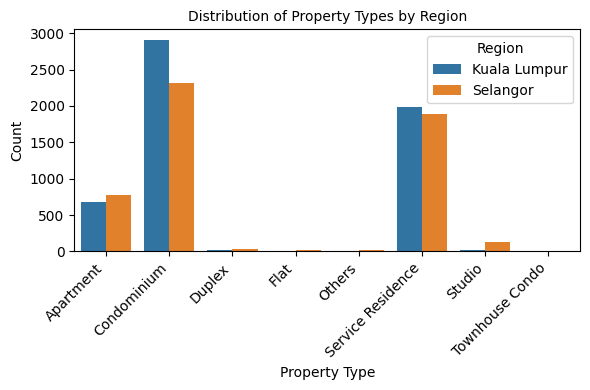

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(data = region_propType, x = 'property_type', y='count', hue='region')

plt.title('Distribution of Property Types by Region', fontsize=10)
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region')
plt.tight_layout()

plt.show()

The chart shows Condominiums as the most common property type in Kuala Lumpur and Selangor, followed by Service Residences. Apartments have moderate representation, while Townhouse Condos appear only in Selangor. Other property types have minimal presence, highlighting a market dominated by Condominiums and Service Residences.


## 2.   Correlation for numerical data



In [ ]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])
numerical_data

,completion_year,monthly_rent,rooms,parking,bathroom,size
0,2022.0,4200.0,5,2.0,6.0,1842.0
3,2020.0,1700.0,2,1.0,2.0,743.0
7,2018.0,1550.0,1,1.0,1.0,700.0
8,2014.0,1400.0,2,1.0,1.0,750.0
10,2019.0,2600.0,2,1.0,2.0,868.0
...,...,...,...,...,...,...
19981,2009.0,1200.0,2,1.0,2.0,780.0
19983,2021.0,885.0,3,2.0,2.0,1015.0
19985,2019.0,1500.0,2,2.0,1.0,455.0
19987,2018.0,1300.0,4,2.0,3.0,1427.0


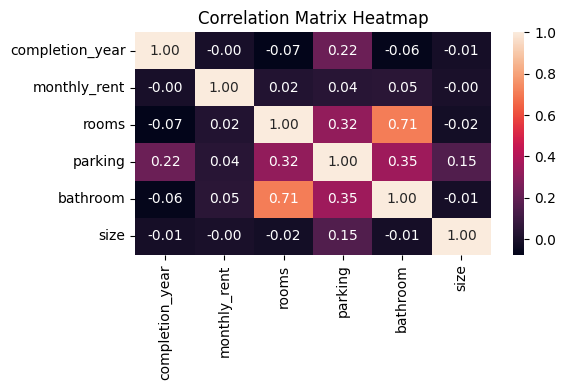

In [ ]:
corr_matrix = numerical_data.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

#There is a positive correlation for monthly tent with number bathroom and parking with 0.05 and 0.04 respectively, means this two element may affect the monthly rent.
#In contrast, completion year and property size tend to not affect the monthly rent due to negative correlation

The heatmap shows moderate correlations between parking and bathrooms (0.35) and completion year and parking (0.22), suggesting newer properties have more parking. Monthly rent and size show minimal correlation with other features, indicating no strong dependencies.

# Principal Components Analysis (PCA)

Principal Component Analysis (PCA) is applied in this project solely for data visualization purposes. The goal is to understand how different numerical features contribute to variations in the dataset and how they relate to each other in a reduced-dimensional space. Since the objective of the project is to predict monthly rent, PCA is not used for dimensionality reduction in model training, as removing components could lead to the loss of important information.


In [ ]:
X = numerical_data
X = X.drop(columns=['monthly_rent'])

# Ensure X is a DataFrame before standardization
X = pd.DataFrame(X, columns=X.columns)
X

,completion_year,rooms,parking,bathroom,size
0,2022.0,5,2.0,6.0,1842.0
3,2020.0,2,1.0,2.0,743.0
7,2018.0,1,1.0,1.0,700.0
8,2014.0,2,1.0,1.0,750.0
10,2019.0,2,1.0,2.0,868.0
...,...,...,...,...,...
19981,2009.0,2,1.0,2.0,780.0
19983,2021.0,3,2.0,2.0,1015.0
19985,2019.0,2,2.0,1.0,455.0
19987,2018.0,4,2.0,3.0,1427.0


Next we use StandardScaler() to standardise the features to ensure all features are on the same scale (mean=0, variance=1).

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Converts to NumPy array

After that, we reduce the dataset to a 3 principal components.

In [ ]:
x_pca_num = PCA(n_components = 3)
x_principal_components = x_pca_num.fit_transform(X_scaled)

Then we apply PCA loadings to show how much each original feature contributes to each principal component. This approach will helps interpret the importance of different features in the reduced space.

In [ ]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Get PCA loadings
pca_loadings = pd.DataFrame(
    x_pca_num.components_,
    columns=X_scaled_df.columns,
    index=["PC1", "PC2", "PC3"]
)

# Display top contributing features for PC1
pca_loadings.T.abs().sort_values(by="PC1", ascending=False)

,PC1,PC2,PC3
bathroom,0.632960,0.186943,0.035606
rooms,0.625033,0.212529,0.032427
parking,0.453705,0.488343,0.009125
size,0.051874,0.396558,0.865308
completion_year,0.012474,0.723979,0.498839


From the PCA loadings table, we can interpret the influence of each original feature on the principal components (PC1, PC2, and PC3). The first principal component (PC1) is strongly influenced by the number of bathrooms (0.63) and rooms (0.62), which suggests that this component primarily represents the size of a property in terms of its room count. The parking availability (0.45) also contributes to PC1, but to a lesser extent than the number of rooms and bathrooms. This means that PC1 mainly captures property characteristics related to space and amenities.

For the second principal component (PC2), completion year (0.72) and parking (0.49) are the most significant contributors. This indicates that PC2 is more related to the age of the property and parking availability, possibly distinguishing between newer and older properties. The third principal component (PC3) is mostly dominated by size (0.86), meaning that this component captures variations in property size more than any other factor. The completion year (0.50) also plays a role in PC3, suggesting that properties of different sizes may also vary in their construction years.

Overall, these results suggest that room count and bathrooms are primary differentiators among properties (PC1), while age and parking availability create another level of distinction (PC2), and size plays a strong independent role (PC3).

## Integrating Principal Components with Regional Context

In [ ]:
x_pca = pd.DataFrame(data = x_principal_components, columns = ["principal component 1", "principal component 2", "principal component 3"])
x_pca["region"] = data["region"].values
x_pca

,principal component 1,principal component 2,principal component 3,region
0,6.692283,-0.546333,-0.866428,Kuala Lumpur
1,-0.626448,0.349637,-0.381035,Kuala Lumpur
2,-2.430316,0.698516,-0.134829,Kuala Lumpur
3,-1.716810,0.023428,0.124080,Kuala Lumpur
4,-0.628293,0.242194,-0.306856,Kuala Lumpur
...,...,...,...,...
10801,-0.646819,-0.832786,0.433726,Selangor
10802,0.931563,1.111110,-0.475458,Selangor
10803,-0.872333,1.459776,-0.229717,Selangor
10804,2.726191,0.224911,-0.351001,Selangor


In [ ]:
print('Explained variation per principal component: {}'.format(x_pca_num.explained_variance_ratio_))
x_pca.tail()

Explained variation per principal component: [0.38925112 0.2358381  0.20220117]


,principal component 1,principal component 2,principal component 3,region
10801,-0.646819,-0.832786,0.433726,Selangor
10802,0.931563,1.111110,-0.475458,Selangor
10803,-0.872333,1.459776,-0.229717,Selangor
10804,2.726191,0.224911,-0.351001,Selangor
10805,-2.434027,0.483478,0.013195,Selangor


### 3D PCA Visualization of Regional Distribution

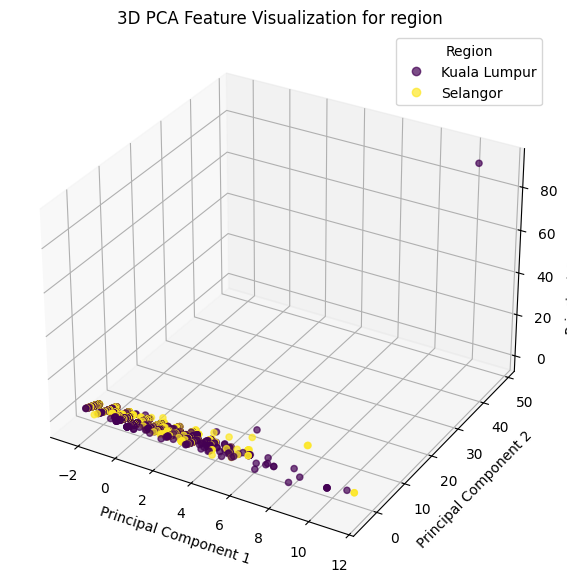

In [ ]:
#3d

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Initialize a 3D figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(x_pca["principal component 1"],
                     x_pca["principal component 2"],
                     x_pca["principal component 3"],
                     c=x_pca["region"].astype("category").cat.codes,  # Convert region to numerical for coloring
                     cmap="viridis", alpha=0.7)

# Labels
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Feature Visualization for region")

# Convert unique region values to a list of strings
legend_labels = list(x_pca["region"].unique())

# Fix legend issue
legend_handles = scatter.legend_elements()[0]  # Get legend elements
plt.legend(handles=legend_handles, labels=legend_labels, title="Region")

plt.show()


Based on the scatter plot above, it shows the two region colors overlap significantly and does not show strong separation between these two regions. This suggests that the numerical features do not vary significantly between these two regions in a way that PCA captures. Other than that, this graph also shows there are some outliers for region Kuala Lumpur as well.

### 3D PCA Visualization of Monthly Rent Distribution

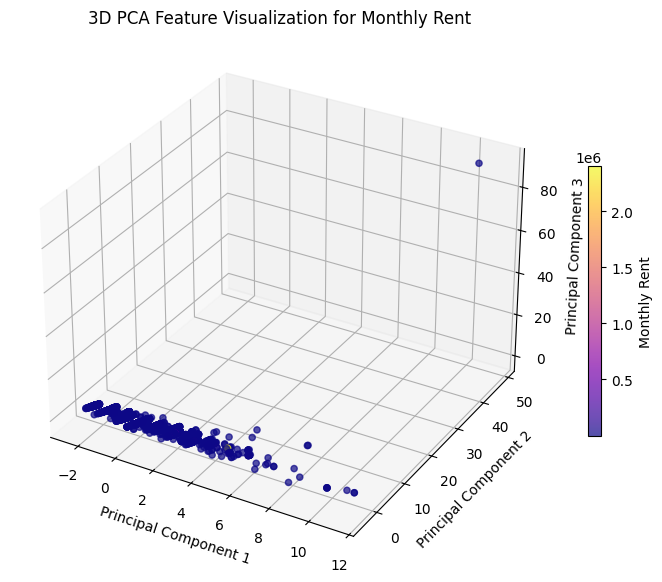

In [ ]:
# Ensure monthly rent is included in the PCA-transformed DataFrame
x_pca["monthly_rent"] = data["monthly_rent"].values

# Initialize a 3D figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(x_pca["principal component 1"],
                     x_pca["principal component 2"],
                     x_pca["principal component 3"],
                     c=x_pca["monthly_rent"],
                     cmap="plasma", alpha=0.7)

# Labels
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Feature Visualization for Monthly Rent")

# Add a colorbar to show rent values
cbar = plt.colorbar(scatter, ax=ax, shrink=0.5)
cbar.set_label("Monthly Rent")

plt.show()

Based on the scatter plot above, it shows the monthly rent is lower since the color scale shows that most data points are in darker blue. Other than that, most of the data points are densely packed near the lower end of Principal Component 1 and 2 which suggests that most properties have similar characteristics along these components.

# 1. Prediction on Monthly Rent for Kuala Lumpur and Selangor

Data Preparation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from imblearn.over_sampling import SMOTENC, SMOTE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

np.log1p(x) computes log(1 + x) to prevent issues with zero values.

Reduces skewness in the 'monthly_rent' distribution.

In [ ]:
# Log transformation for data balance
data["monthly_rent"] = np.log1p(data["monthly_rent"])

Define Numerical Features and extracts selected numerical features from data.

Define Categorical Features and extracts categorical features, excluding 'facilities' and 'additional_facilities' (as noted in the comment).

In [ ]:
n = ['completion_year', 'size', 'parking', 'bathroom', 'rooms']
numerical = data[n]

c = ['property_type', 'furnished', 'region'] # exclude 'facilities', 'additional_facilities',
categorical = data[c]

Remove outlier row for X (features) and y (target)

In [ ]:
rows_to_remove = []

In [ ]:
# Search ourlier index from numerical
for col in numerical:
  Q1 = numerical[col].quantile(0.25)
  Q3 = numerical[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound_numerical = Q1 - 1.5 * IQR
  upper_bound_numerical = Q3 + 1.5 * IQR

  outlier_index = data.loc[(numerical[col] < lower_bound_numerical) | (numerical[col] > upper_bound_numerical)].index
  rows_to_remove.extend(outlier_index)

In [ ]:
# Search ourlier index from targte
Q1 = data["monthly_rent"].quantile(0.25)
Q3 = data["monthly_rent"].quantile(0.75)
IQR = Q3 - Q1

lower_bound_y = Q1 - 1.5 * IQR
upper_bound_y = Q3 + 1.5 * IQR

outlier_index = data.loc[(data["monthly_rent"] < lower_bound_y) | (data["monthly_rent"] > upper_bound_y)].index.tolist()
rows_to_remove.extend(outlier_index)

In [ ]:
rows_to_remove = list(set(rows_to_remove))  # Convert to unique list to avoid duplicate deletions
data_clean = data.drop(rows_to_remove).reset_index(drop=True)

In [ ]:
numerical_new = data_clean[n]
categorical_new = data_clean[c]
y_processed= data_clean["monthly_rent"]  # y

Normalization for numerical value (from features)

In [ ]:
scaler = MinMaxScaler()
numerical_scaled = pd.DataFrame(scaler.fit_transform(numerical_new), columns=n)

## One Hot Encoder for categorical data (from features)

In [ ]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_onehot = pd.DataFrame(encoder.fit_transform(categorical_new), columns=encoder.get_feature_names_out(c))

In [ ]:
# Comnbine processed numerical and categorical data becocome X
X_processed = pd.concat([numerical_scaled, categorical_onehot], axis=1) #X

In [ ]:
print(X_processed.shape)
print(y_processed.shape)

(7265, 15)
(7265,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size=0.3, random_state=0)

## 1. Random Forest Regressor

We chose Random Forest Regressor because it handles non-linear relationships, mixed data types, and missing values well, making it ideal for predicting rental prices. It also reduces overfitting by averaging multiple trees and identifies key features influencing rent. With a dataset of nearly 20,000 records, it balances accuracy and efficiency effectively.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_RF = RF.predict(X_test)

In [ ]:
mae_RF = mean_absolute_error(y_test, y_pred_RF)
mse_RF = mean_squared_error(y_test, y_pred_RF)
r2_RF = r2_score(y_test, y_pred_RF)

print("Result for Random Forest Regressor")
print(f"Mean Absolute Error: {mae_RF}")
print(f"Mean Squared Error: {mse_RF}")
print(f"R2 Score: {r2_RF}")

Result for Random Forest Regressor
Mean Absolute Error: 0.11637861745860753
Mean Squared Error: 0.028838873906244414
R2 Score: 0.7208108021107161


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameters and their values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the RandomForestRegressor model
RF = RandomForestRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(RF, param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Best model
best_rf = grid_search.best_estimator_

# Predictions
y_pred_RF = best_rf.predict(X_test)

# Evaluation Metrics
mae_RF = mean_absolute_error(y_test, y_pred_RF)
mse_RF = mean_squared_error(y_test, y_pred_RF)
r2_RF = r2_score(y_test, y_pred_RF)

print(f"Mean Absolute Error: {mae_RF}")
print(f"Mean Squared Error: {mse_RF}")
print(f"R2 Score: {r2_RF}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Mean Absolute Error: 0.11874850961792126
Mean Squared Error: 0.028983163391959266
R2 Score: 0.7194139353012994


## 2. Linear Regression

We chose Linear Regression because it is a simple yet effective model for predicting rental prices. It works well when there is a linear relationship between features  and the target variable (monthly_rent).

Linear Regression is also interpretable, allowing you to understand how each feature affects rent. It performs efficiently on large datasets and serves as a baseline model for comparison with more complex models like Random Forest.

In [ ]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_LF = LR.predict(X_test)

In [ ]:
mae_LR = mean_absolute_error(y_test, y_pred_LF)
mse_LR = mean_squared_error(y_test, y_pred_LF)
r2_LR = r2_score(y_test, y_pred_LF)

print("Result for Linear Regression")
print(f"Mean Absolute Error: {mae_LR}")
print(f"Mean Squared Error: {mse_LR}")
print(f"R2 Score: {r2_LR}")

Result for Linear Regression
Mean Absolute Error: 0.17919775860024587
Mean Squared Error: 0.053850712938237226
R2 Score: 0.4786711367486115


## 3. Histogram Gradient Boosting Regressor


We chose Histogram Gradient Boosting Regressor because it efficiently handles large datasets, captures non-linear relationships, and improves predictions through boosting. It is robust to missing data and optimizes performance by reducing errors iteratively. This makes it a powerful choice for rental price prediction compared to simpler models.

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

HGB = HistGradientBoostingRegressor(max_iter=100, learning_rate=0.1, max_depth=5, random_state=42)
HGB.fit(X_train, y_train)

HistGradientBoostingRegressor(max_depth=5, random_state=42)

In [ ]:
y_pred_HGB = HGB.predict(X_test)

In [ ]:
mae_HGB = mean_absolute_error(y_test, y_pred_HGB)
mse_HGB = mean_squared_error(y_test, y_pred_HGB)
r2_HGB = r2_score(y_test, y_pred_HGB)

print("Result for Histogram Gradient Boosting Regressor")
print(f"Mean Absolute Error: {mae_HGB}")
print(f"Mean Squared Error: {mse_HGB}")
print(f"R2 Score: {r2_HGB}")

Result for Histogram Gradient Boosting Regressor
Mean Absolute Error: 0.14314400453283002
Mean Squared Error: 0.036472858407001596
R2 Score: 0.6469061823812984


In [ ]:

from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the hyperparameter distribution
param_dist = {
    'max_iter': np.arange(100, 1000, 100),  # Number of boosting iterations
    'learning_rate': np.linspace(0.01, 0.3, 10),  # Step size shrinkage
    'max_depth': np.arange(3, 15, 2),  # Tree depth
    'min_samples_leaf': np.arange(1, 50, 5),  # Minimum samples per leaf
    'l2_regularization': np.linspace(0.0, 1.0, 10)  # L2 regularization
}

# Initialize the model
HGB = HistGradientBoostingRegressor(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(HGB, param_dist, n_iter=20, cv=5, n_jobs=-1, verbose=2, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", random_search.best_params_)

# Best model
best_HGB = random_search.best_estimator_

# Predictions
y_pred_HGB = best_HGB.predict(X_test)

# Evaluation Metrics
mae_HGB = mean_absolute_error(y_test, y_pred_HGB)
mse_HGB = mean_squared_error(y_test, y_pred_HGB)
r2_HGB = r2_score(y_test, y_pred_HGB)

print(f"Mean Absolute Error: {mae_HGB}")
print(f"Mean Squared Error: {mse_HGB}")
print(f"R2 Score: {r2_HGB}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'min_samples_leaf': 1, 'max_iter': 600, 'max_depth': 9, 'learning_rate': 0.042222222222222223, 'l2_regularization': 0.0}
Mean Absolute Error: 0.12483654734948661
Mean Squared Error: 0.029763850631365583
R2 Score: 0.7118561005231163


## 4.eXtreme Gradient Boosting


We chose Extreme Gradient Boosting (XGBoost) because it is highly efficient, handles non-linear relationships, and performs well with large datasets. It leverages boosting techniques to minimize errors iteratively, making it more accurate than traditional models. XGBoost is also robust to missing data, supports regularization to prevent overfitting, and is optimized for speed and scalability, making it ideal for rental price prediction.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Result for Histogram Gradient Boosting Regressor")
print(f"Mean Absolute Error: {mae_xgb}")
print(f"Mean Squared Error: {mse_xgb}")
print(f"R2 Score: {r2_xgb}")

Result for Histogram Gradient Boosting Regressor
Mean Absolute Error: 0.13597886813564847
Mean Squared Error: 0.03405934736472414
R2 Score: 0.6887847096365314


In [ ]:
# Define parameter grid for XGBoost tuning
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# Perform Randomized Search for best parameters
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
random_search = RandomizedSearchCV(xgb_model, param_grid, cv=3, n_iter=10, scoring='neg_mean_squared_error', verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters
best_params = random_search.best_params_
best_xgb = random_search.best_estimator_

# Predictions
y_pred = best_xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred)
mse_xgb = mean_squared_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)

print("Result for Histogram Gradient Boosting Regressor")
print(f"Mean Absolute Error: {mae_xgb}")
print(f"Mean Squared Error: {mse_xgb}")
print(f"R2 Score: {r2_xgb}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Result for Histogram Gradient Boosting Regressor
Mean Absolute Error: 0.12598997930302944
Mean Squared Error: 0.03074657647702886
R2 Score: 0.7190549594649102


## Feature Important

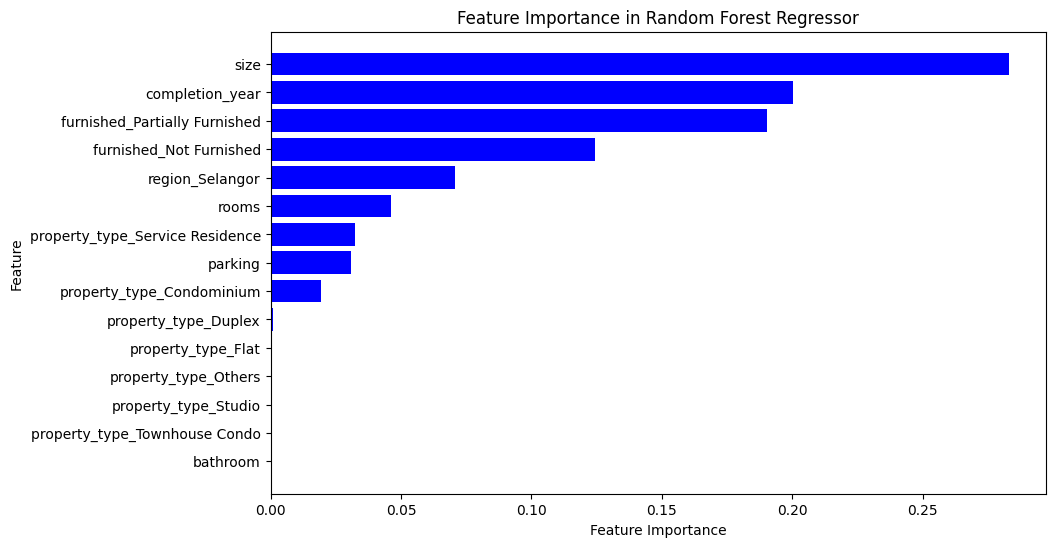

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = best_rf.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)



# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='blue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Regressor")
plt.gca().invert_yaxis()
plt.show()


# Conclusion


The predictive models developed in this analysis provide valuable insights into the problem at hand. By leveraging machine learning techniques such as Random Forest, Linear Regression, Histogram Gradient Boosting, and Extreme Gradient Boosting, we have demonstrated the ability to generate accurate predictions, which can be utilized for informed decision-making.

The evaluation of model performance shows that tuning hyperparameters enhances prediction accuracy. Random Forest and Histogram Gradient Boosting emerged as strong contenders with the highest R² scores, signifying their reliability in capturing complex patterns in the data. Linear Regression, while providing a more interpretable model, exhibited lower predictive performance, indicating its limitations in handling non-linearity in the data.

Assessing the models based on key metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² Score allows us to determine the most effective approaches for making accurate predictions. The improvements after parameter tuning highlight the importance of model optimization in achieving better performance.

Additionally, the feature importance analysis from the Random Forest Regressor provides key insights into the most influential factors affecting predictions. The most significant features include property size, completion year, and furnishing status, suggesting that these variables play a critical role in determining property values. Other important factors such as the number of rooms, parking availability, and property type also contribute to the model's predictions. These insights can be used to guide stakeholders in focusing on the most relevant factors when making property-related decisions.

Based on these findings, we recommend utilizing ensemble models such as Random Forest and Gradient Boosting techniques for better predictive accuracy. These models can be further fine-tuned with additional feature engineering and data preprocessing to enhance their effectiveness. The insights from this analysis can help in solving the selected problems by enabling data-driven strategies and improving decision-making processes.